<a href="https://colab.research.google.com/github/yendriferreira/Credit-Card-FraudML/blob/main/Data_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

files = os.listdir('/kaggle/input/creditcardfraud')
print("Files in dataset directory:", files)

# Load the CSV into a DataFrame
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

Path to dataset files: /kaggle/input/creditcardfraud
Files in dataset directory: ['creditcard.csv']


# Análisis Exploratorio para Detección de Fraude en Tarjetas de Crédito
# Enfoque en comprensión profunda de datos desbalanceados

# 1. CONTEXTO DEL PROBLEMA Y DESCRIPCIÓN
# =====================================

DESCRIPCIÓN DEL PROBLEMA:

Las compañías de tarjetas de crédito necesitan detectar transacciones fraudulentas para proteger a sus clientes.
Este problema tiene características particulares:

1. Alto desbalance de clases: Solo 0.172% de las transacciones son fraudulentas (492 de 284,807)
2. Confidencialidad: Las características originales han sido transformadas mediante PCA
3. Costo asimétrico: El costo de no detectar un fraude es mucho mayor que el de investigar una falsa alarma
4. Necesidad de detección en tiempo real: Idealmente, las transacciones fraudulentas deben ser
   identificadas rápidamente

---


UTILIDAD DE UNA SOLUCIÓN BASADA EN ML:
- Automatización del proceso de detección
- Capacidad para identificar patrones complejos que reglas simples no detectarían.
- Adaptabilidad a nuevos patrones de fraude mediante reentrenamiento.
- Posibilidad de trabajar con grandes volúmenes de datos en tiempo real.
- Capacidad para manejar el desbalance de clases mediante técnicas especializadas.

---

CONTEXTO DEL PROBLEMA Y DESCRIPCIÓN. Las compañías de tarjetas de crédito enfrentan desafíos significativos para detectar transacciones fraudulentas en tiempo real. Una solución basada en aprendizaje automático es ideal para este
problema debido a su capacidad para identificar patrones complejos y adaptarse a nuevos tipos de fraude.
En este análisis exploratorio, nos enfocaremos en comprender profundamente el dataset disponible,
enfrentando particularmente el reto del extremo desbalance de clases (solo 0.172% de transacciones
son fraudulentas) y su impacto en la evaluación de características.

*# Analizando Columnas*

---

*DESCRIPCIÓN DE VARIABLES*
----------------------------------------
Significado de las variables:
- Time: Segundos transcurridos entre cada transacción y la primera del dataset
- Amount: Monto de la transacción
- V1-V28: Componentes principales obtenidas mediante PCA (transformaciones de las características originales)
- Class: Variable objetivo (1 = Fraude, 0 = No Fraude)

Tipo de codificación de variables:
- Time: Numérica (continua) - Tiempo en segundos
- Amount: Numérica (continua) - Monto en unidades monetarias
- V1-V28: Numérica (continua) - Componentes PCA normalizadas
- Class: Categórica binaria (0/1) - Indica presencia de fraude

In [6]:
def analyze_dataframe(df):
    print(" Analisis del DataFrame ")
    print("-" * 30)

    # 1. Dimensiones
    print("\n Dimensiones:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("-" * 30)

    # 2. Columnas y tipos de datos
    print("\n Columnas y Tipos de Datos:")
    column_info = df.dtypes.reset_index()
    column_info.columns = ['Column Name', 'Data Type']
    print(column_info.to_string(index=False))

    print("-" * 30)

    # 3. Informacion basica
    print("\n Informacion Basica:")
    df.info()
    print("-" * 30)

    # 4. Valores faltantes
    print("\n Valores Faltantes:")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    if missing_values.empty:
        print("No se encontraron valores faltantes.")
    else:
        print(missing_values.to_string())
    print("-" * 30)

    # 5. Conteo de valores (para tipos object, boolean, y numericos con baja cardinalidad)
    print("\n Conteo de Valores (Top 10 para cada columna relevante):")
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'bool' or (df[col].dtype in ['int64', 'float64'] and df[col].nunique() < 20):
            print(f"\n Columna '{col}':")
            print(df[col].value_counts().head(10).to_string())
    print("-" * 30)

    # 6. Estadisticas descriptivas
    print("\n Estadisticas Descriptivas (Columnas Numericas):")
    # Transponer para mejor legibilidad
    print(df.describe().T.to_string())
    print("-" * 30)

    # 7. Distribucion de clases (si existe columna 'Class')
    if 'Class' in df.columns:
        print("\n Distribucion de Clases (columna 'Class'):")
        class_counts = df['Class'].value_counts()
        class_percent = df['Class'].value_counts(normalize=True) * 100
        class_info = pd.DataFrame({'Count': class_counts, 'Percentage': class_percent.round(2)})
        print(class_info.to_string())
        print("-" * 30)

analyze_dataframe(df)

 Analisis del DataFrame 
------------------------------

 Dimensiones:
Rows: 284807, Columns: 31
------------------------------

 Columnas y Tipos de Datos:
Column Name Data Type
       Time   float64
         V1   float64
         V2   float64
         V3   float64
         V4   float64
         V5   float64
         V6   float64
         V7   float64
         V8   float64
         V9   float64
        V10   float64
        V11   float64
        V12   float64
        V13   float64
        V14   float64
        V15   float64
        V16   float64
        V17   float64
        V18   float64
        V19   float64
        V20   float64
        V21   float64
        V22   float64
        V23   float64
        V24   float64
        V25   float64
        V26   float64
        V27   float64
        V28   float64
     Amount   float64
      Class     int64
------------------------------

 Informacion Basica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data col

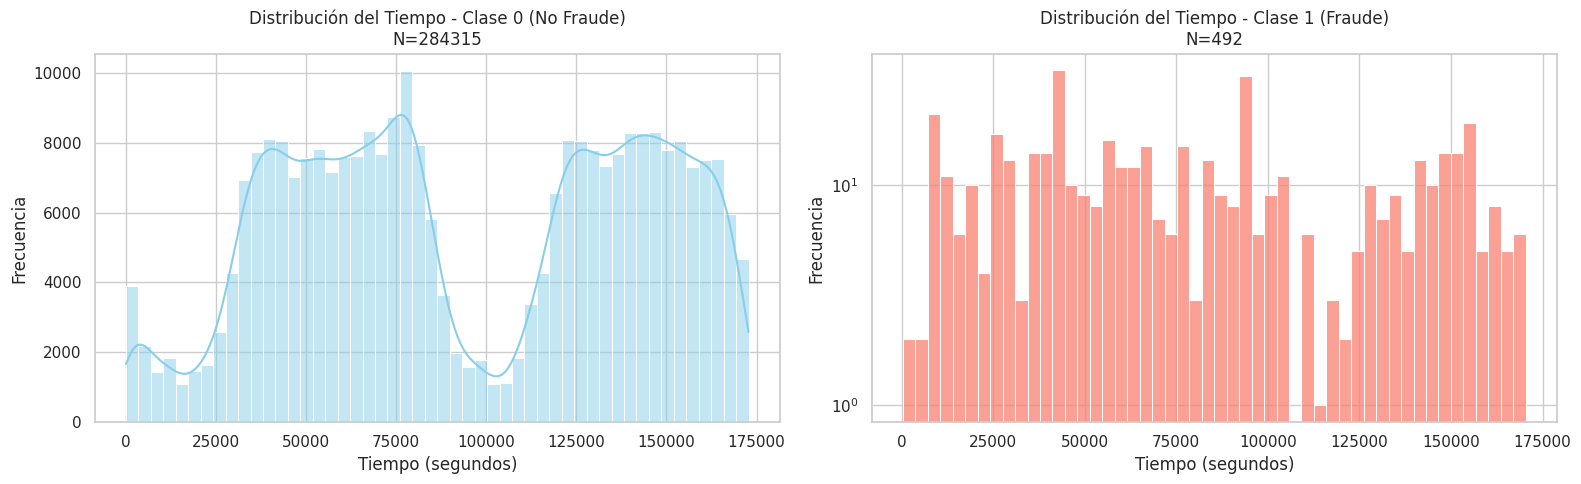

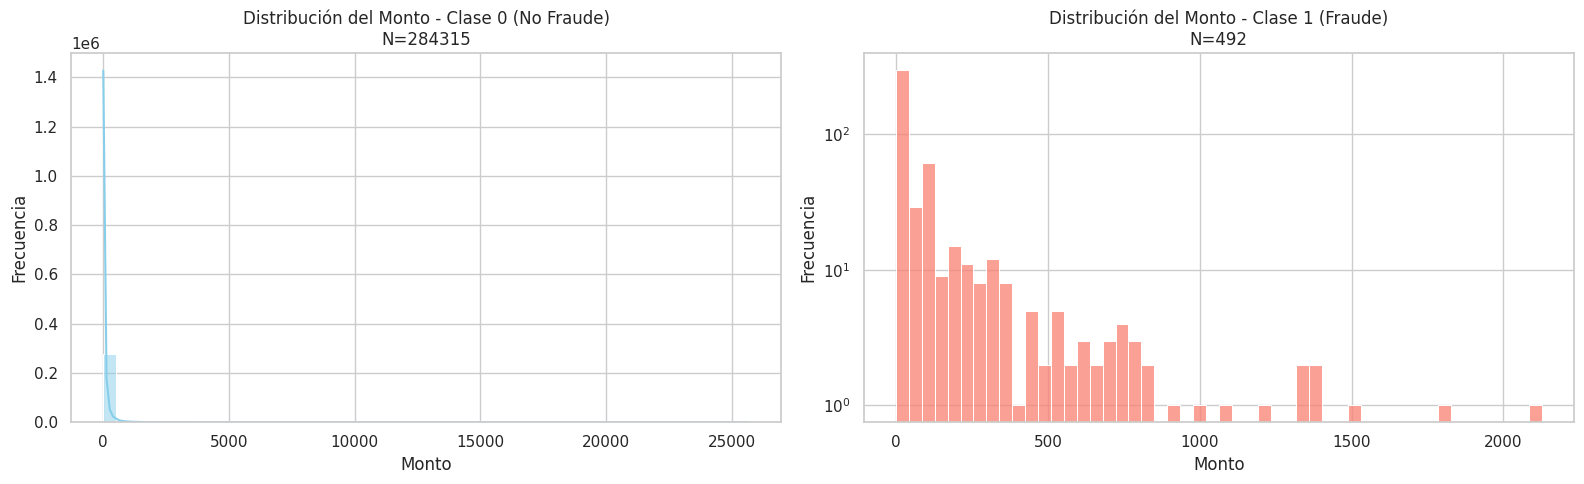

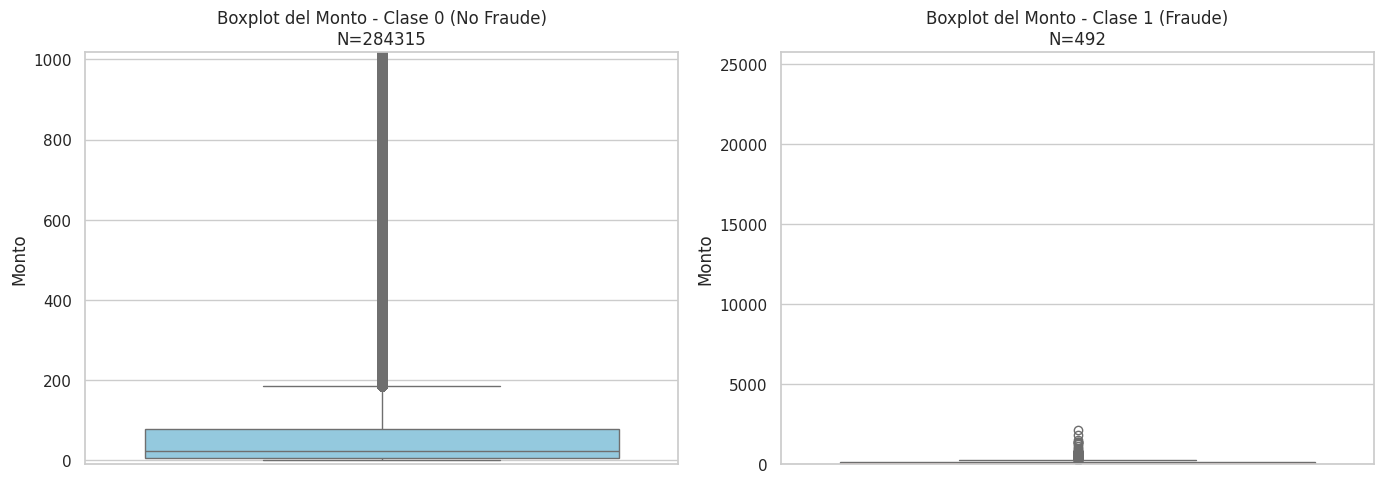

/tmp/ipython-input-7-3940730555.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_time = df.groupby(pd.cut(df['Time'], bins=100))['Class'].agg(['sum', 'count'])


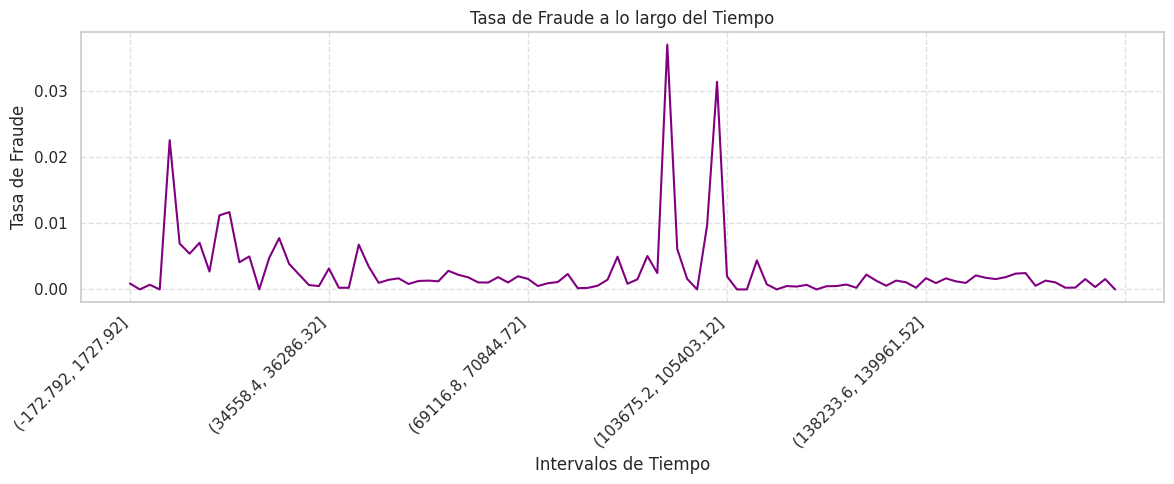

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Distribución del tiempo por clase

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Clase 0
sns.histplot(df[df['Class'] == 0], x='Time', bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribución del Tiempo - Clase 0 (No Fraude)\nN={len(df[df["Class"]==0])}')
axes[0].set_xlabel('Tiempo (segundos)')
axes[0].set_ylabel('Frecuencia')

# Clase 1
sns.histplot(df[df['Class'] == 1], x='Time', bins=50, kde=False, ax=axes[1], color='salmon')
axes[1].set_title(f'Distribución del Tiempo - Clase 1 (Fraude)\nN={len(df[df["Class"]==1])}')
axes[1].set_xlabel('Tiempo (segundos)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_yscale("log")

plt.tight_layout()
plt.show()


# Distribución del monto por clase

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Clase 0
sns.histplot(df[df['Class'] == 0], x='Amount', bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribución del Monto - Clase 0 (No Fraude)\nN={len(df[df["Class"]==0])}')
axes[0].set_xlabel('Monto')
axes[0].set_ylabel('Frecuencia')

# Clase 1
sns.histplot(df[df['Class'] == 1], x='Amount', bins=50, kde=False, ax=axes[1], color='salmon')
axes[1].set_title(f'Distribución del Monto - Clase 1 (Fraude)\nN={len(df[df["Class"]==1])}')
axes[1].set_xlabel('Monto')
axes[1].set_ylabel('Frecuencia')
axes[1].set_yscale("log")

plt.tight_layout()
plt.show()


# Boxplot del monto por clase

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Clase 0
sns.boxplot(y='Amount', data=df[df['Class'] == 0], ax=axes[0], color='skyblue')
axes[0].set_title(f'Boxplot del Monto - Clase 0 (No Fraude)\nN={len(df[df["Class"]==0])}')
axes[0].set_ylabel('Monto')
axes[0].set_ylim(-10, df['Amount'].quantile(0.99))

# Clase 1
sns.boxplot(y='Amount', data=df[df['Class'] == 1], ax=axes[1], color='salmon')
axes[1].set_title(f'Boxplot del Monto - Clase 1 (Fraude)\nN={len(df[df["Class"]==1])}')
axes[1].set_ylabel('Monto')
axes[1].set_ylim(-10, df['Amount'].max() + 20)

plt.tight_layout()
plt.show()


# Tasa de fraude a lo largo del tiempo

# Agrupamiento en 100 intervalos de tiempo
fraud_by_time = df.groupby(pd.cut(df['Time'], bins=100))['Class'].agg(['sum', 'count'])
fraud_by_time['Fraud_Rate'] = fraud_by_time['sum'] / fraud_by_time['count']

plt.figure(figsize=(12, 5))
fraud_by_time['Fraud_Rate'].plot(kind='line', color='purple')
plt.title('Tasa de Fraude a lo largo del Tiempo')
plt.xlabel('Intervalos de Tiempo')
plt.ylabel('Tasa de Fraude')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-1225201770.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette={'0': 'skyblue', '1': 'salmon'})
/tmp/ipython-input-8-1225201770.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette={'0': 'skyblue', '1': 'salmon'})
/tmp/ipython-input-8-1225201770.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette={'0': 'skyblue', '1': 'salmon'})
/tmp/ipython-input-8-1225201770.py:8: FutureWarning: 

Passing `palette` without assigning 

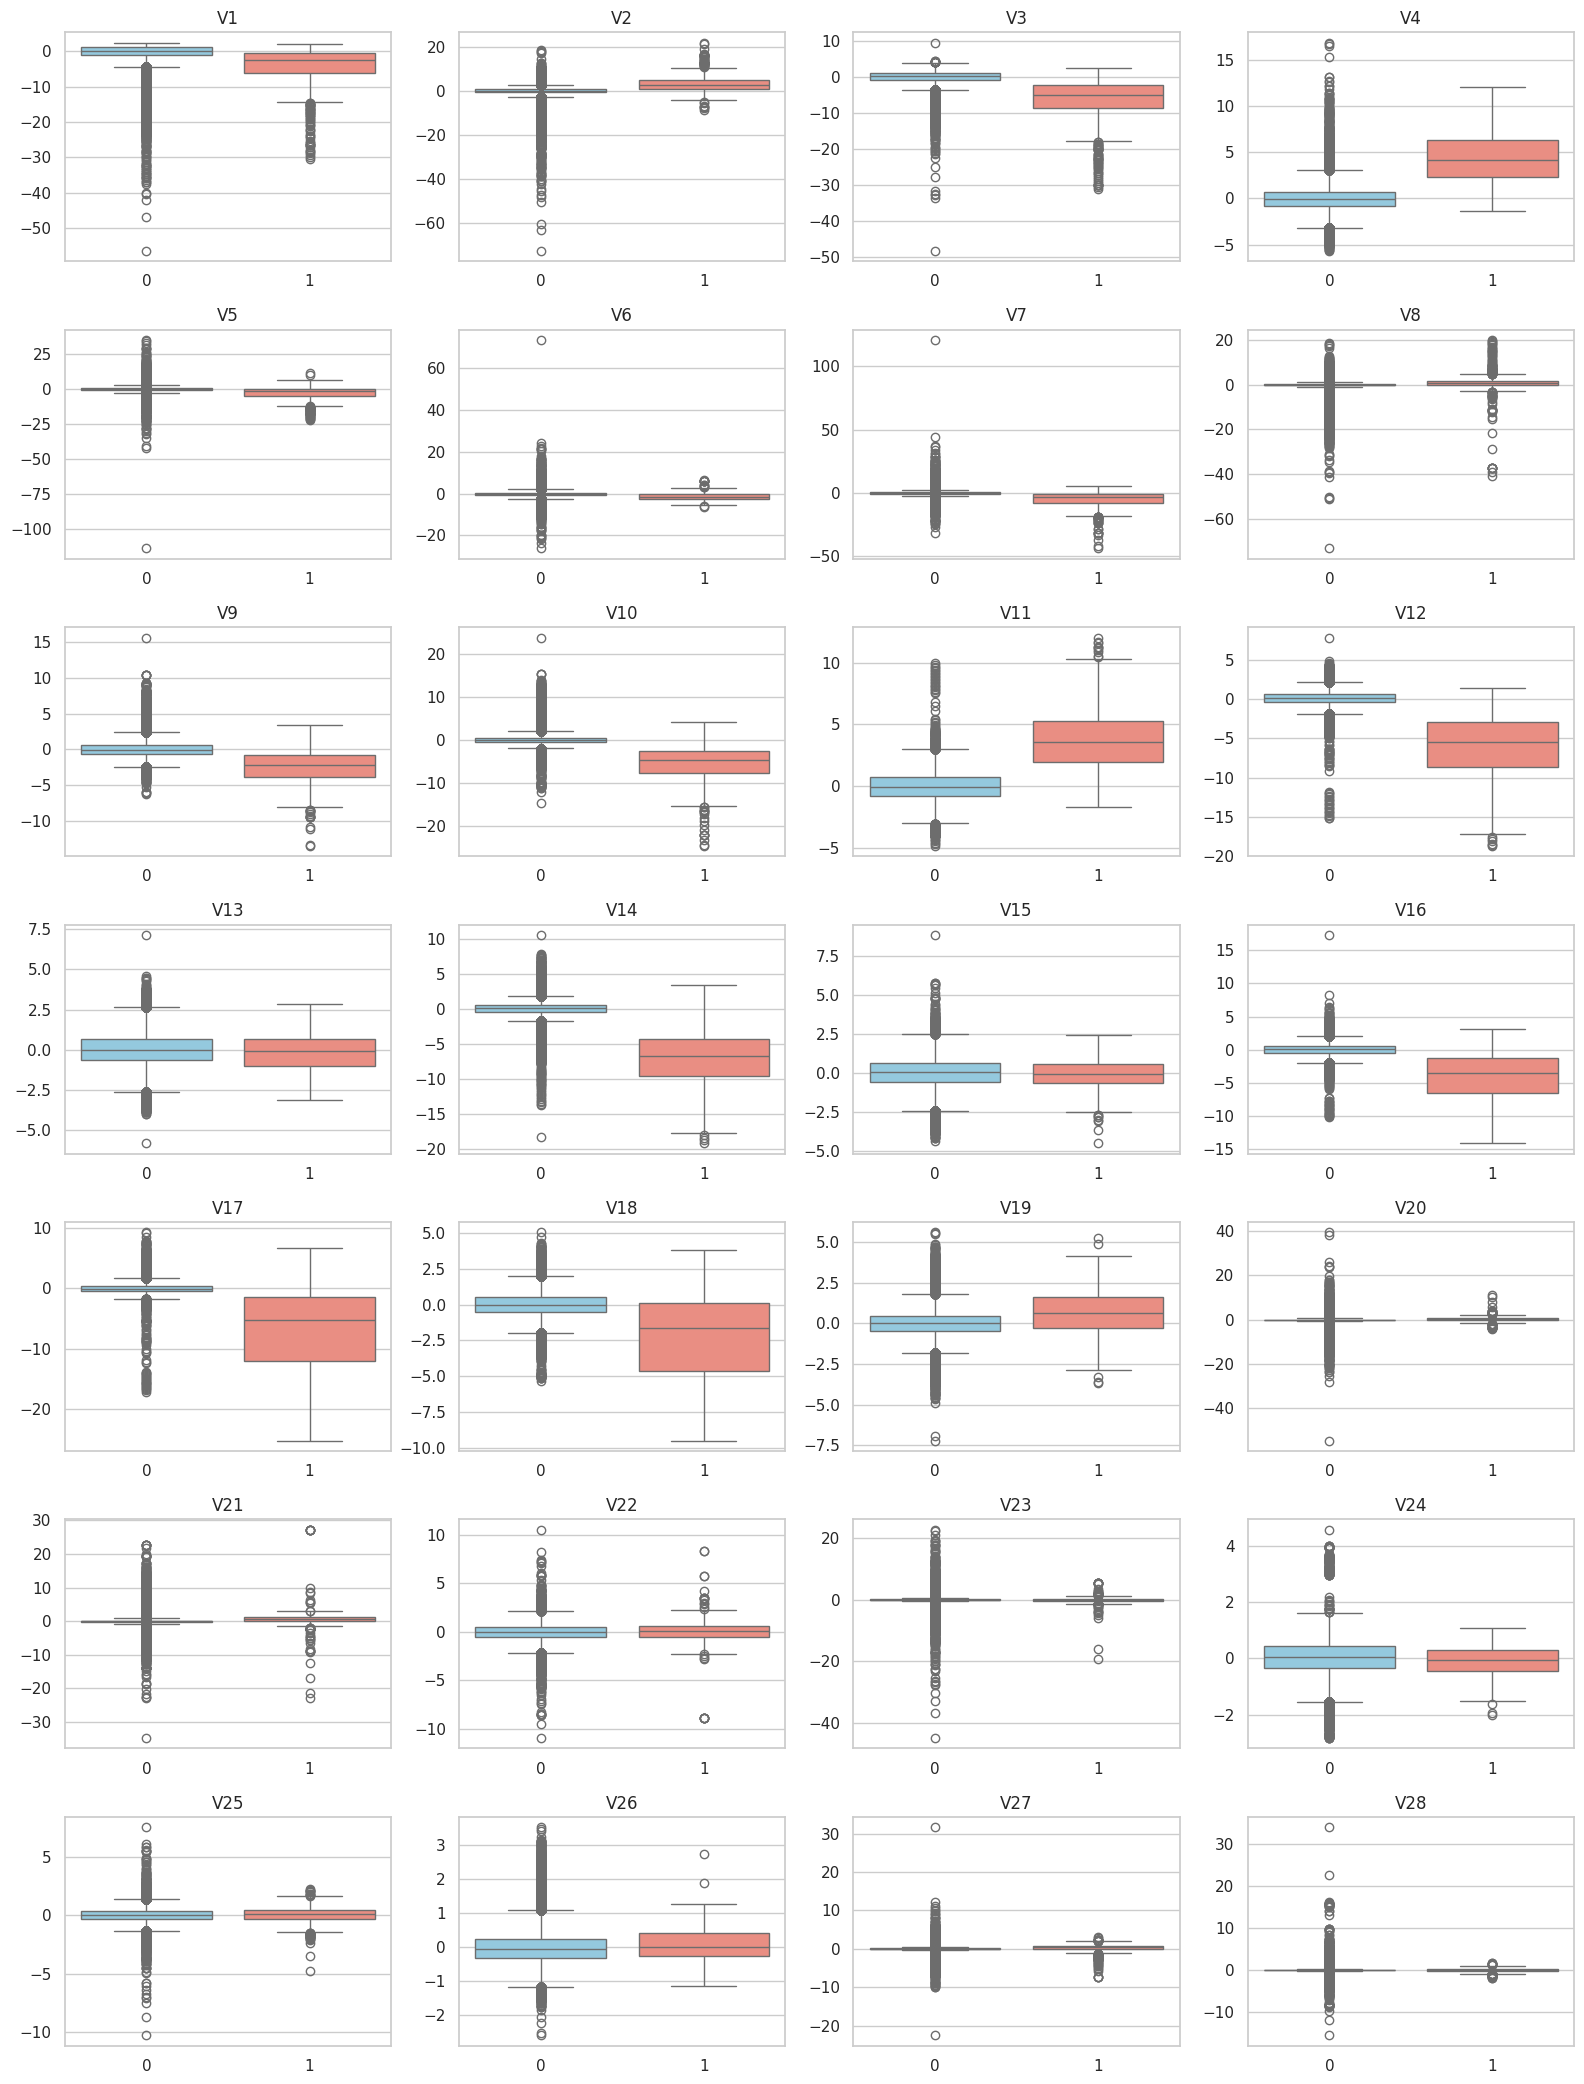

In [8]:
selected_features = [f'V{i}' for i in range(1, 29)]
n_cols = 4
n_rows = (len(selected_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(selected_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Class', y=col, data=df, palette={'0': 'skyblue', '1': 'salmon'})
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


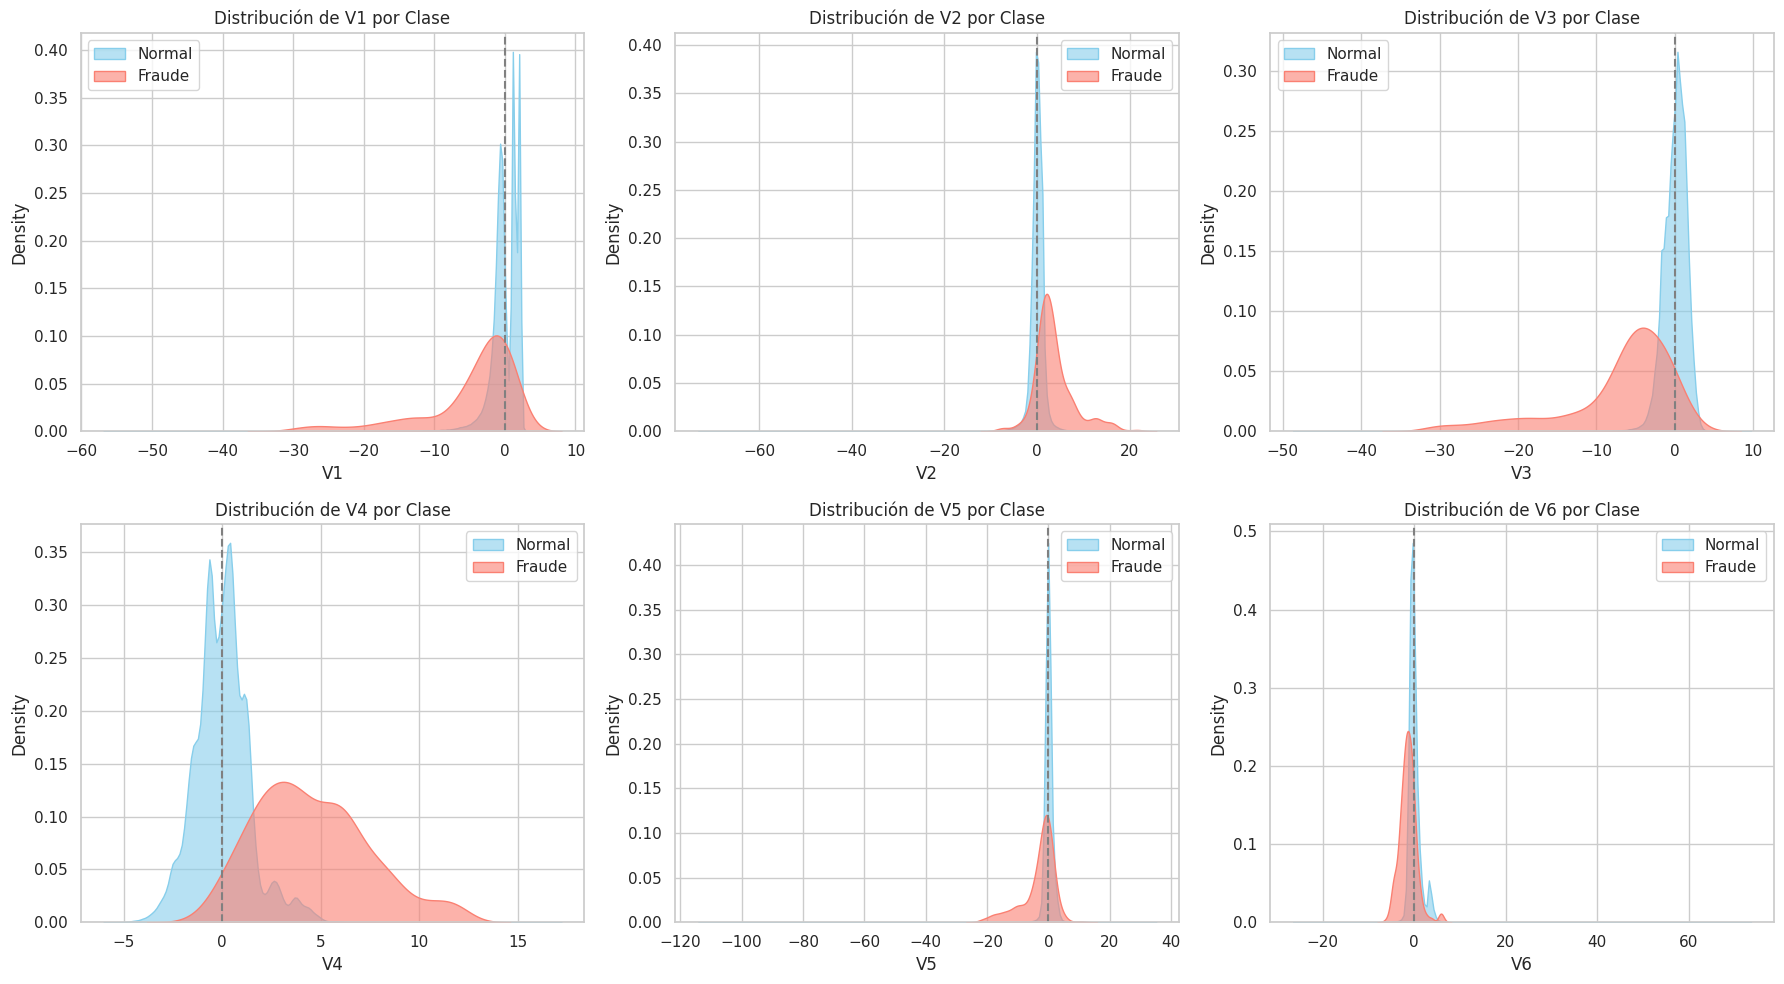

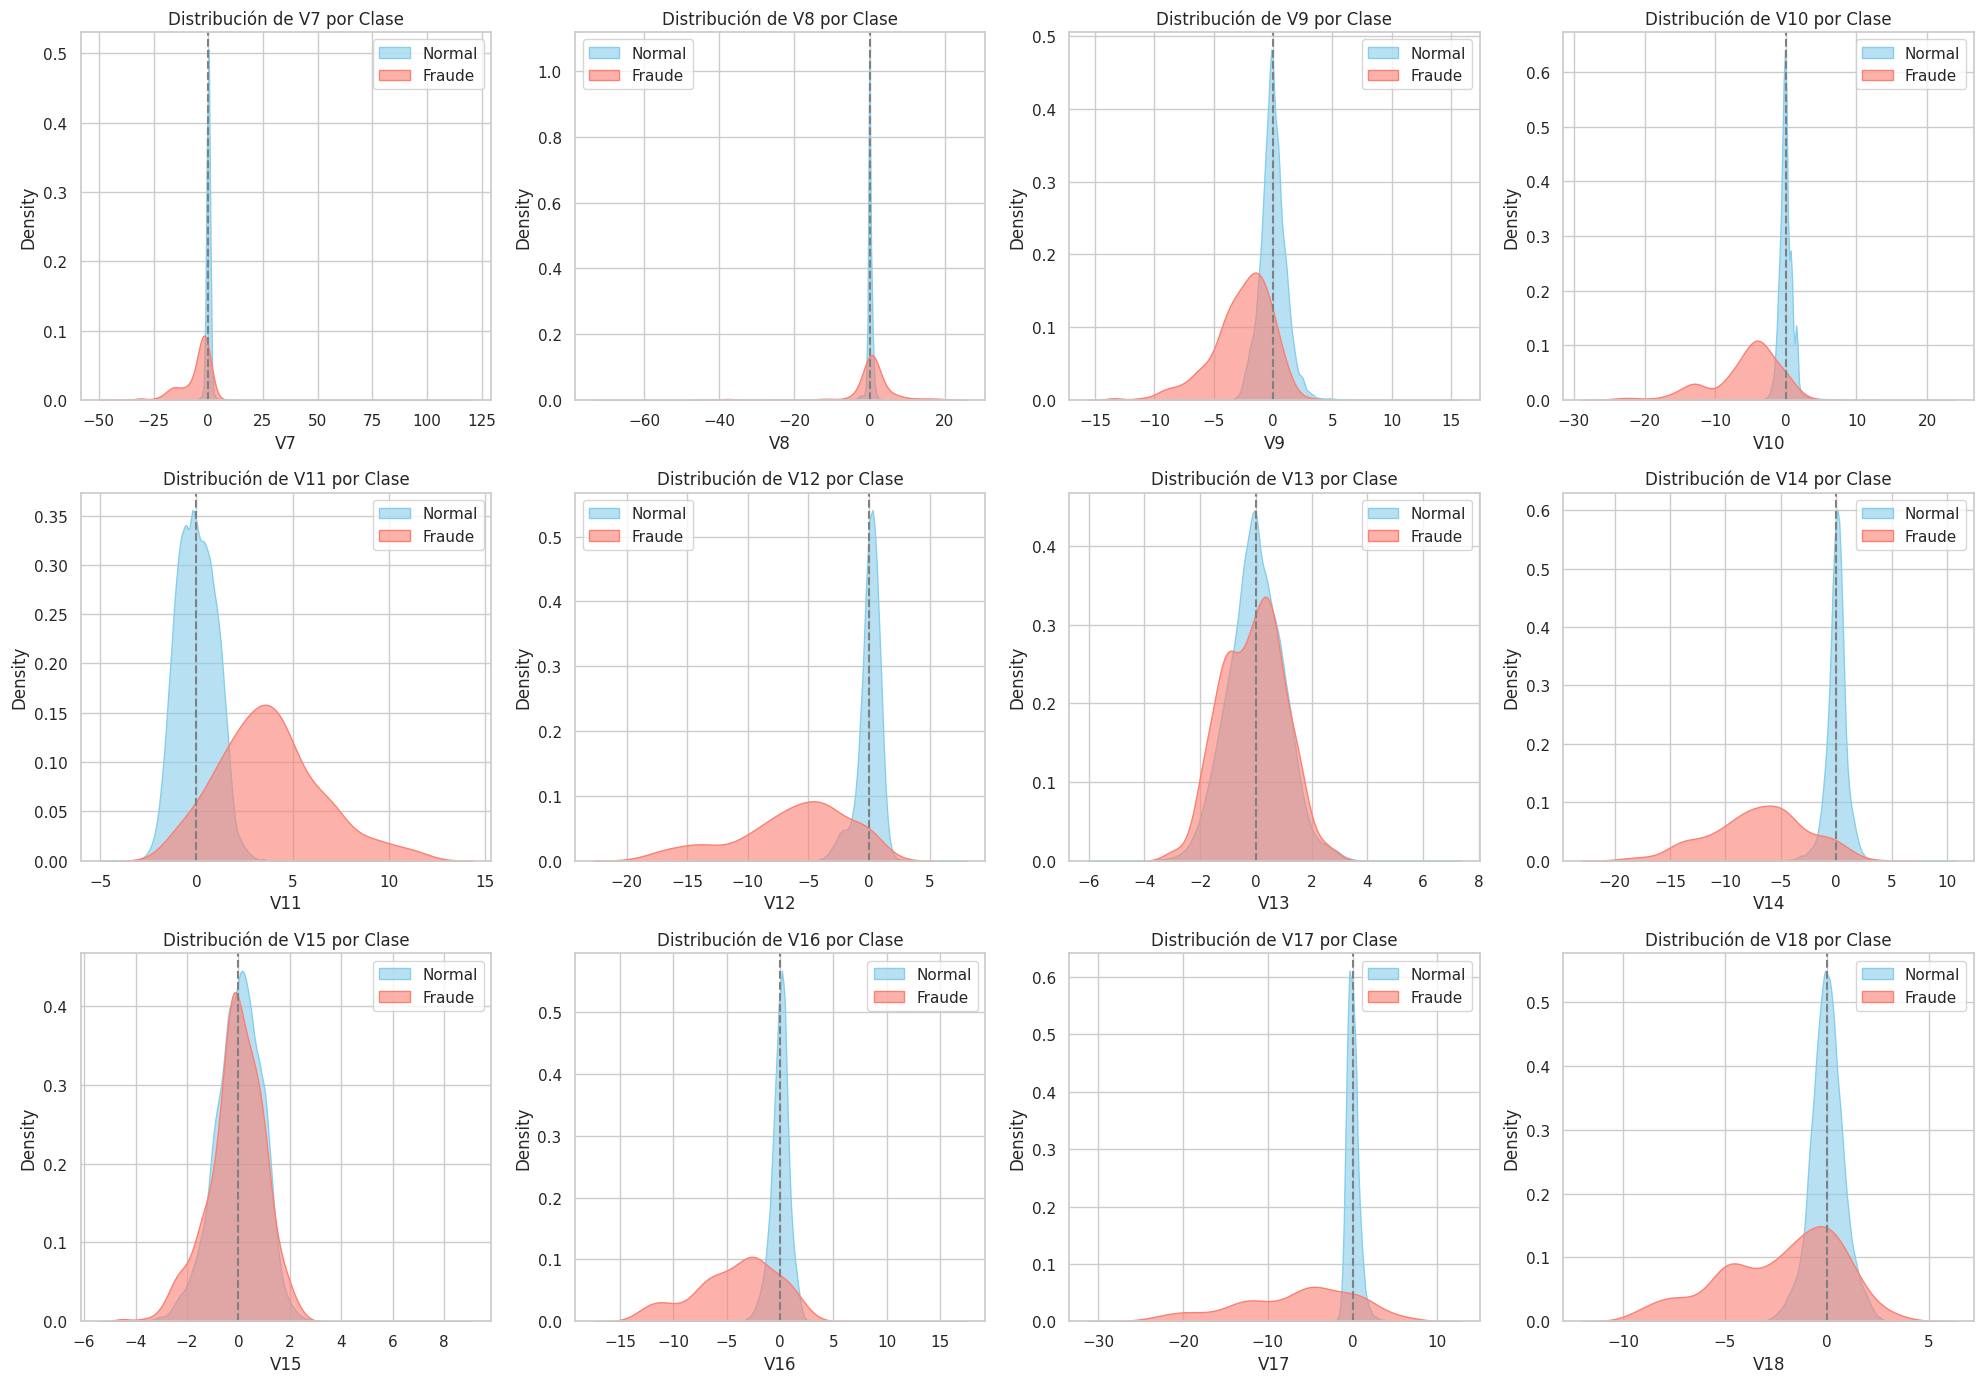

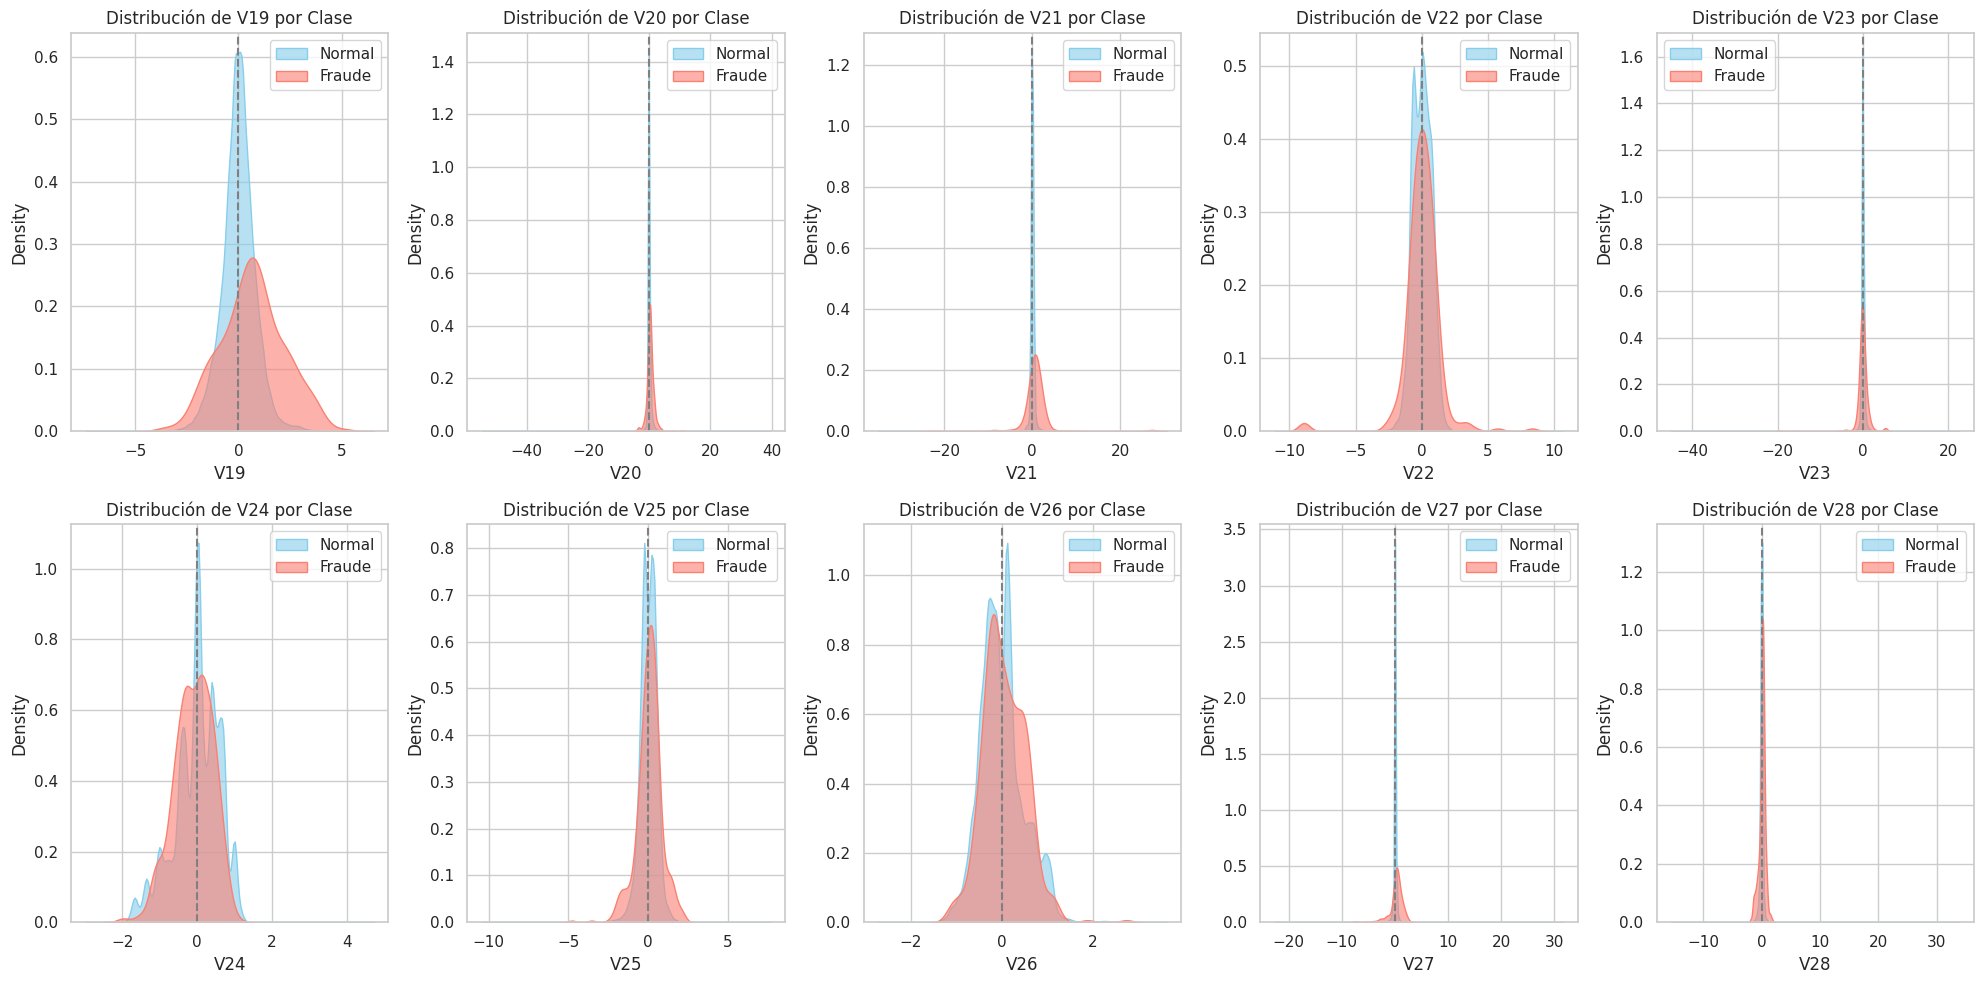

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Variables a analizar (ya están en espacio PCA en el dataset original)
selected_features = [f'V{i}' for i in range(1, 29)]

# Primer bloque: V1 a V6
plt.figure(figsize=(18, 10))
for i, feature in enumerate(selected_features[:6]):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(df[df['Class'] == 0][feature], label='Normal', fill=True, color='skyblue', alpha=0.6)
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraude', fill=True, color='salmon', alpha=0.6)
    plt.title(f'Distribución de {feature} por Clase')
    plt.axvline(0, linestyle='--', color='gray')
    plt.legend()

plt.tight_layout()
plt.show()

# Segundo bloque: V7 a V18
plt.figure(figsize=(20, 14))
for i, feature in enumerate(selected_features[6:18]):
    plt.subplot(3, 4, i + 1)
    sns.kdeplot(df[df['Class'] == 0][feature], label='Normal', fill=True, color='skyblue', alpha=0.6)
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraude', fill=True, color='salmon', alpha=0.6)
    plt.title(f'Distribución de {feature} por Clase')
    plt.axvline(0, linestyle='--', color='gray')
    plt.legend()

plt.tight_layout()
plt.show()

# Tercer bloque: V19 a V28
plt.figure(figsize=(20, 10))
for i, feature in enumerate(selected_features[18:]):
    plt.subplot(2, 5, i + 1)
    sns.kdeplot(df[df['Class'] == 0][feature], label='Normal', fill=True, color='skyblue', alpha=0.6)
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraude', fill=True, color='salmon', alpha=0.6)
    plt.title(f'Distribución de {feature} por Clase')
    plt.axvline(0, linestyle='--', color='gray')
    plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


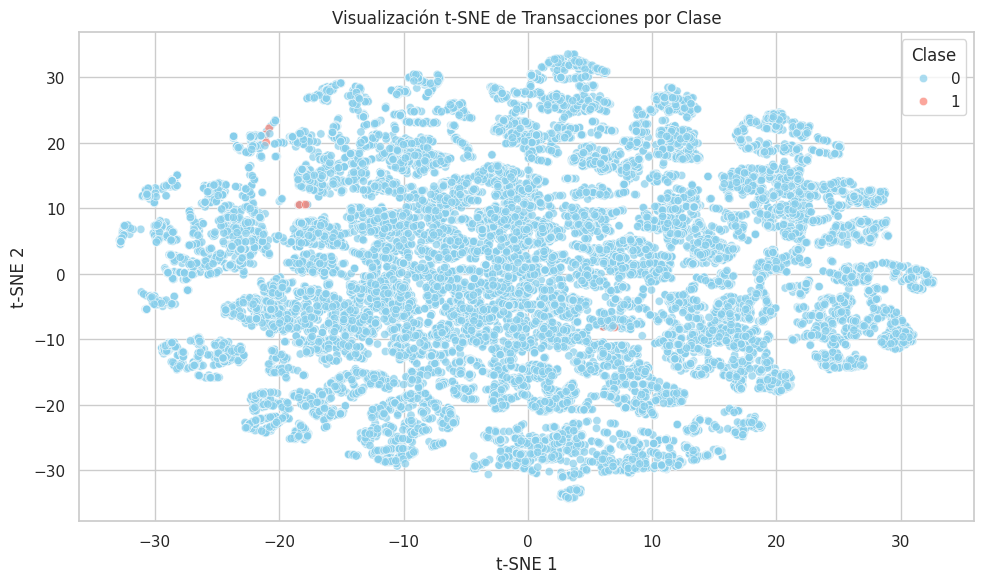

In [10]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las características (excluyendo la clase)
features = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]
X = df[features]
y = df['Class']

#  Muestreo para reducir el tiempo de cómputo
sample_frac = 0.1  # 10% del total
df_sampled = df.sample(frac=sample_frac, random_state=42)
X_sampled = df_sampled[features]
y_sampled = df_sampled['Class']

# Escalar los datos (muy importante para t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

# Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=500, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convertir a DataFrame para graficar
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y_sampled.values

# Visualizar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette={0: 'skyblue', 1: 'salmon'}, alpha=0.7)
plt.title('Visualización t-SNE de Transacciones por Clase')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Clase')
plt.tight_layout()
plt.show()
